In [1]:
## importing the librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data sets

In [2]:
books=pd.read_csv('data/Books.csv')

C:\Users\Hp\AppData\Local\Temp\ipykernel_20136\3844548411.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('data/Books.csv')


In [3]:
user=pd.read_csv('data/Users.csv')

In [4]:
ratings=pd.read_csv('data/Ratings.csv')

## Preprocessing And Exploratory Data Analysis (EDA)

In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
print(books.shape)
print(ratings.shape)
print(user.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


- __`Checking for Null Values`__

In [9]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [11]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

- __`Ckecking for Duplicated Values`__

In [12]:
books.duplicated().sum()

0

In [13]:
user.duplicated().sum()

0

In [14]:
ratings.duplicated().sum()

0

- __`Removing null values`__

In [15]:
books[books.isnull().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [16]:
# dropping all the null values permanently
books.dropna(inplace=True)

In [17]:
# rechecking the books dataset
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  object
 4   Publisher            271354 non-null  object
 5   Image-URL-S          271354 non-null  object
 6   Image-URL-M          271354 non-null  object
 7   Image-URL-L          271354 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB


- `Basic EDA`

In [18]:
# Numbers of Unique Book Authors in our dataset
books['Book-Author'].nunique()

102020

In [19]:
# Numbers of Unique Book Publishers in our dataset
books['Publisher'].nunique()

16803

In [20]:
# Authors with the highest books
books['Book-Author'].value_counts().head(20)

Agatha Christie          632
William Shakespeare      567
Stephen King             524
Ann M. Martin            423
Carolyn Keene            373
Francine Pascal          372
Isaac Asimov             330
Nora Roberts             315
Barbara Cartland         307
Charles Dickens          302
Not Applicable (Na )     286
R. L. Stine              282
Mark Twain               231
Jane Austen              223
Terry Pratchett          220
Mary Higgins Clark       218
Piers Anthony            217
Marion Zimmer Bradley    216
Janet Dailey             214
Franklin W. Dixon        204
Name: Book-Author, dtype: int64

Text(0.5, 1.0, 'Book-Author')

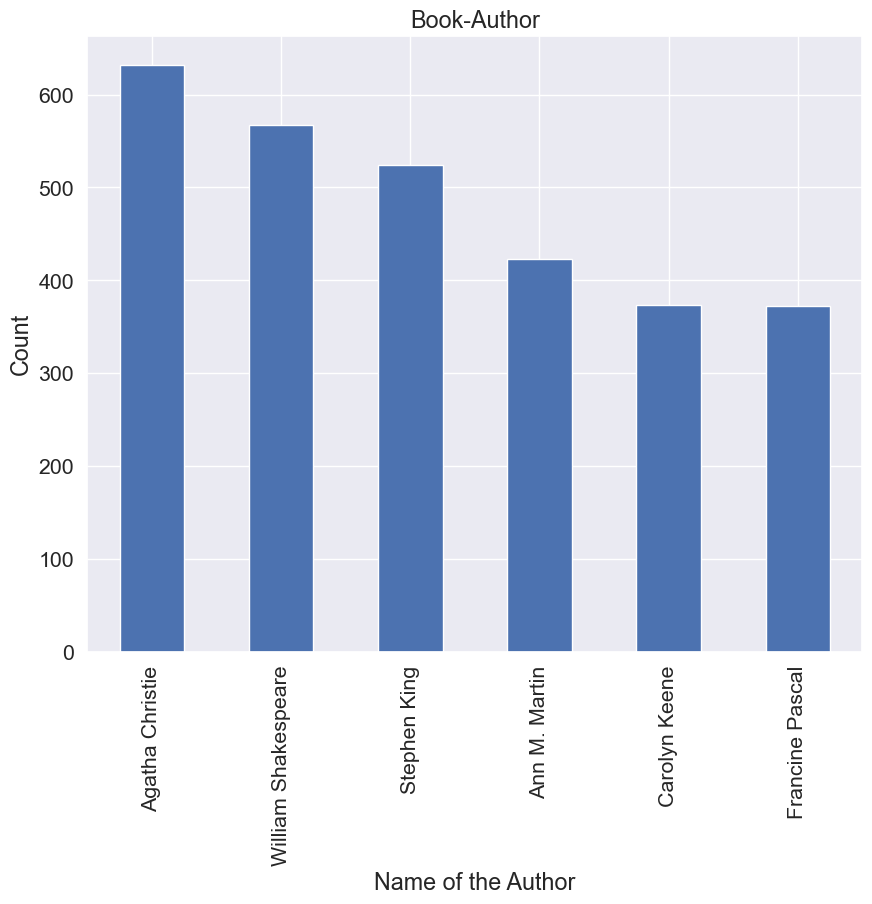

In [21]:
sns.set(font_scale=1.4)
books['Book-Author'].value_counts()[:6].plot(kind='bar', figsize=(10,8), 
                                                      xlabel='Name of the Author', 
                                                      ylabel='Count')
plt.title('Book-Author')

In [22]:
# Top 5 books that has been republished many times
books['Book-Title'].value_counts().head()

Selected Poems       27
Little Women         24
Wuthering Heights    21
Dracula              20
The Secret Garden    20
Name: Book-Title, dtype: int64

Text(0.5, 1.0, 'Book-Title')

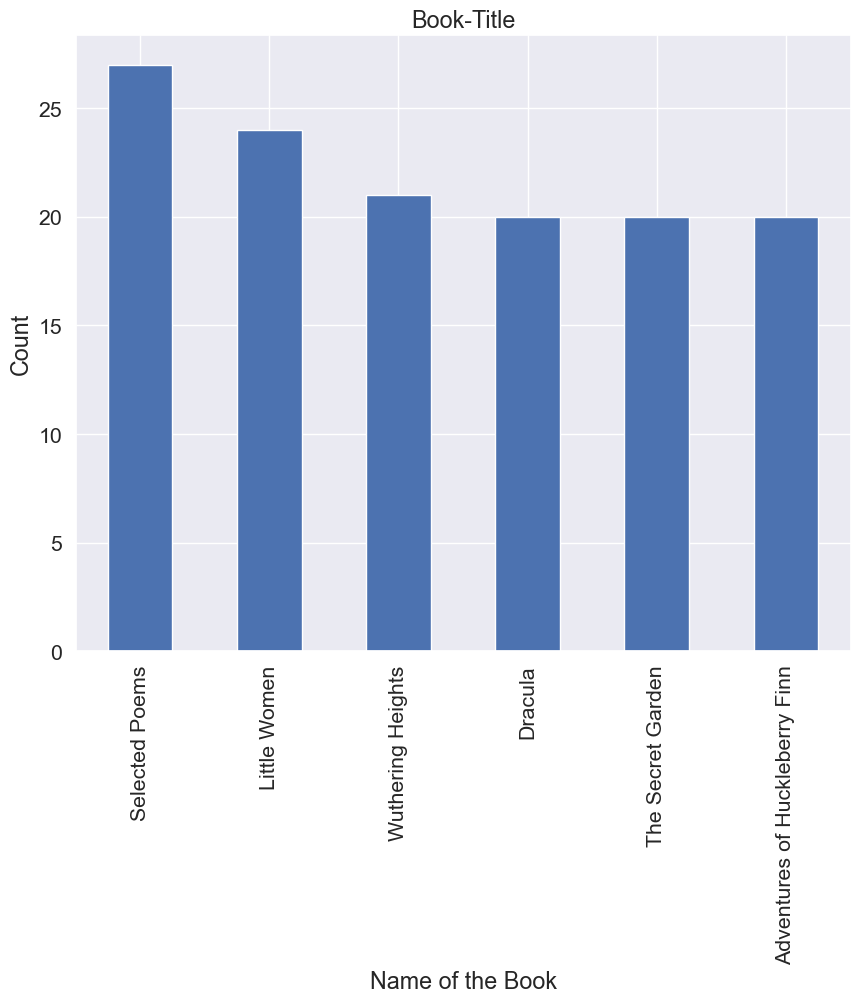

In [23]:
sns.set(font_scale= 1.4)
books['Book-Title'].value_counts()[:6].plot(kind='bar', figsize=(10,8), 
                                                      xlabel='Name of the Book', 
                                                      ylabel='Count')

plt.title("Book-Title")

In [24]:
# Top 5 publication year that has seen maximum publications
books['Year-Of-Publication'].value_counts()[:6]

2002    13902
2001    13714
1999    13414
2000    13373
1998    12116
2003    11610
Name: Year-Of-Publication, dtype: int64

Text(0.5, 1.0, 'Year-Of-Publication')

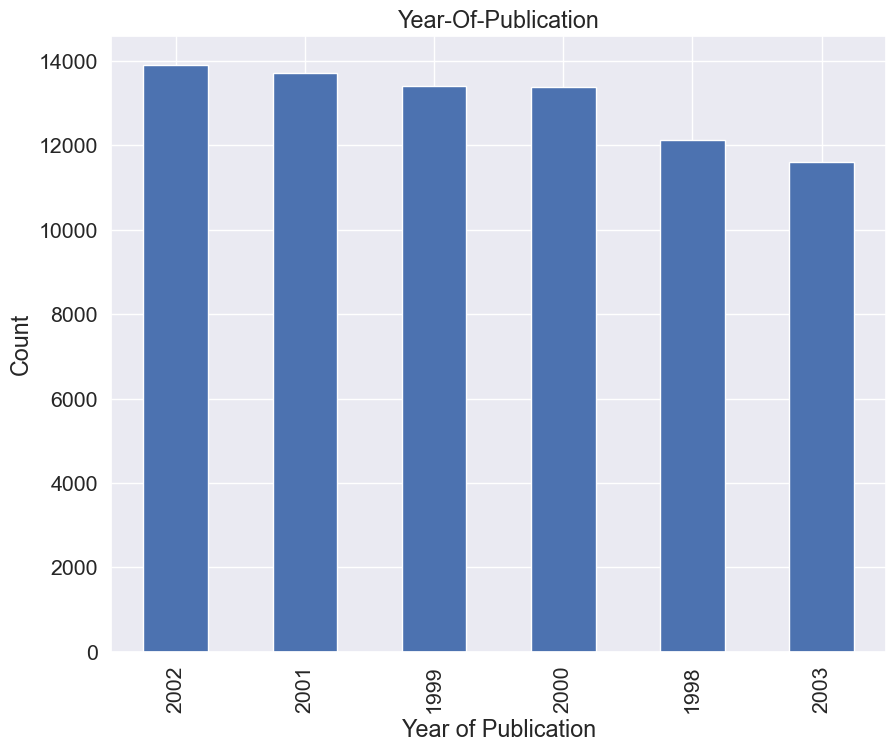

In [25]:
sns.set(font_scale= 1.4)
books['Year-Of-Publication'].value_counts()[:6].plot(kind='bar', figsize=(10,8), 
                                                      xlabel='Year of Publication', 
                                                      ylabel='Count')

plt.title("Year-Of-Publication")

In [26]:
# Top 5 Publishers with maximum books being puublished
books['Publisher'].value_counts()[:6]

Harlequin           7535
Silhouette          4220
Pocket              3905
Ballantine Books    3783
Bantam Books        3646
Scholastic          3160
Name: Publisher, dtype: int64

<AxesSubplot:xlabel='Publisher', ylabel='Count'>

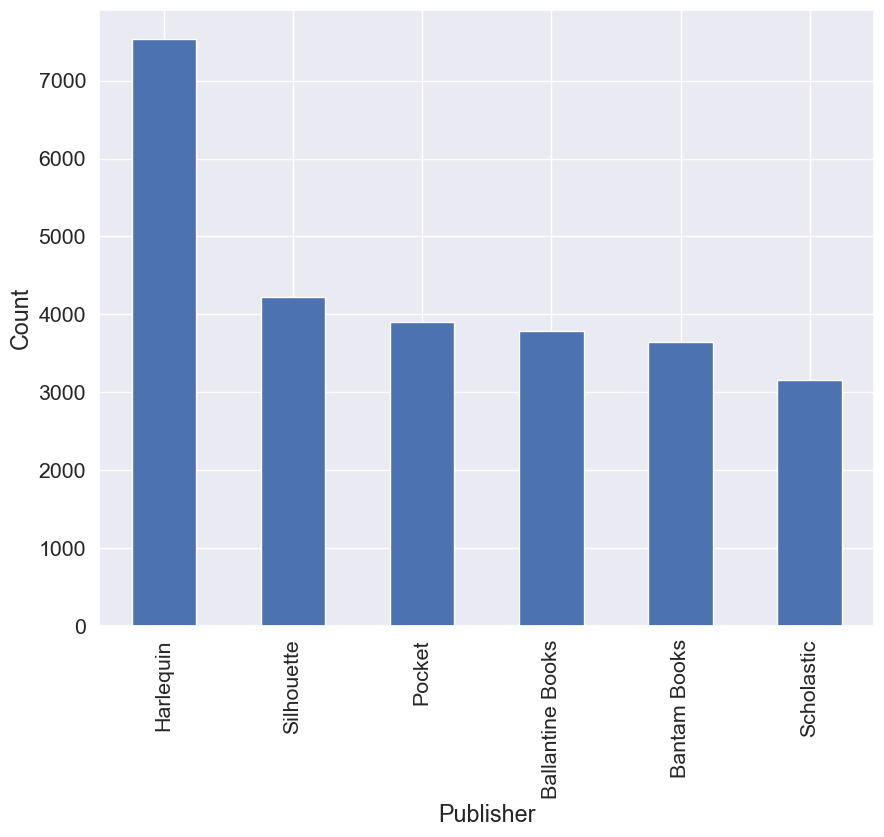

In [27]:
sns.set(font_scale=1.4)
books['Publisher'].value_counts()[:6].plot(kind='bar', figsize=(10,8), 
                                                      xlabel='Publisher', 
                                                      ylabel='Count')

# Popularity Based Recommendation System

### Merge the ratting  data set with book data set frame

In [28]:
books.head(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...


In [29]:
ratings.head(1)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0


- `we clearly see that ISBn is comman so we merge on that `

In [30]:
ratting_with_name=ratings.merge(books,on='ISBN')

In [31]:
ratting_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [32]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


`finding the average ratting of books but taking that book only which ratting voate is greater than 250`

In [33]:
num_ratting_df=ratting_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_ratting_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_ratting_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241061,Ã?Â?lpiraten.,2
241062,Ã?Â?rger mit Produkt X. Roman.,4
241063,Ã?Â?sterlich leben.,1
241064,Ã?Â?stlich der Berge.,3


## Popularity Based Recommandation System

- `we are display top ratted 50 books but books have minimum ratting of 250 votes`

In [34]:
avg_ratings_df=ratting_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()

In [35]:
avg_ratings_df.rename(columns={'Book-Rating':'avg-rating'},inplace=True)
avg_ratings_df

,Book-Title,avg-rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241061,Ã?Â?lpiraten.,0.000000
241062,Ã?Â?rger mit Produkt X. Roman.,5.250000
241063,Ã?Â?sterlich leben.,7.000000
241064,Ã?Â?stlich der Berge.,2.666667


In [36]:
popular_df=num_ratting_df.merge(avg_ratings_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg-rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241061,Ã?Â?lpiraten.,2,0.000000
241062,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241063,Ã?Â?sterlich leben.,1,7.000000
241064,Ã?Â?stlich der Berge.,3,2.666667


In [37]:
popular_df=popular_df[popular_df['num_ratings']>=250].sort_values('avg-rating',ascending=False)

In [38]:
popular_df

,Book-Title,num_ratings,avg-rating
80432,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80420,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80439,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80424,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80412,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...,...
227696,Vinegar Hill (Oprah's Book Club (Paperback)),265,2.245283
233630,Whispers,286,2.199301
143374,Presumed Innocent,294,2.139456
94380,Isle of Dogs,288,2.000000


In [39]:
popular_df=popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg-rating']]


In [40]:
list(popular_df['Book-Title'].values)

['Harry Potter and the Prisoner of Azkaban (Book 3)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 "Harry Potter and the Sorcerer's Stone (Book 1)",
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Harry Potter and the Chamber of Secrets (Book 2)',
 'The Hobbit : The Enchanting Prelude to The Lord of the Rings',
 'The Fellowship of the Ring (The Lord of the Rings, Part 1)',
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
 'The Two Towers (The Lord of the Rings, Part 2)',
 'To Kill a Mockingbird',
 'The Da Vinci Code',
 'The Five People You Meet in Heaven',
 'The Catcher in the Rye',
 'The Lovely Bones: A Novel',
 '1984',
 'Prodigal Summer: A Novel',
 'Neverwhere',
 'The Secret Life of Bees',
 'Stupid White Men ...and Other Sorry Excuses for the State of the Nation!',
 "Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",
 'The Red Tent (Bestselling Backlist)',
 "The Hitchhiker's Guide to the Galaxy",
 'Nickel and Dimed: On (Not) 

In [41]:
popular_df.head()

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg-rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453


In [42]:
popular_df['Image-URL-M']

0      http://images.amazon.com/images/P/0439136350.0...
3      http://images.amazon.com/images/P/0439139597.0...
5      http://images.amazon.com/images/P/0590353403.0...
9      http://images.amazon.com/images/P/043935806X.0...
13     http://images.amazon.com/images/P/0439064872.0...
                             ...                        
716    http://images.amazon.com/images/P/0380730138.0...
717    http://images.amazon.com/images/P/0440216745.0...
727    http://images.amazon.com/images/P/0446359866.0...
733    http://images.amazon.com/images/P/0425182908.0...
739    http://images.amazon.com/images/P/0971880107.0...
Name: Image-URL-M, Length: 186, dtype: object

In [43]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [44]:
import pickle

In [45]:
file=open('popular.pkl','wb')
pickle.dump(popular_df,file)
file.close()

## Collaborative Filtering Based Recommandation System

- `every book and every user is not consider we consider only those user who ratted more than 200 books`
- `And consider only thos books only on which minimum get 50 ratings`

In [46]:
ratting_with_name.head(1)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


## ----------Considering The Those user who rate more than 200 books-----------------------

In [47]:
x=ratting_with_name.groupby('User-ID').count()['Book-Rating']>200 
good_reader_users=x[x].index

In [48]:
filtered_ratting=ratting_with_name[ratting_with_name['User-ID'].isin(good_reader_users)]

## ----------------- Consider The Book which got ratting minimum 50 and more ratting -----------

In [49]:
y=filtered_ratting.groupby('Book-Title').count()['Book-Rating']>=50
famous_books=y[y].index

In [50]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [51]:
final_ratings=filtered_ratting[filtered_ratting['Book-Title'].isin(famous_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026717,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027916,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028770,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029063,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [52]:
final_ratings.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026717,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027916,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028770,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029063,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [53]:
pt=final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [54]:
pt.fillna(0,inplace=True)

In [55]:
pt.tail(200)

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
The Clinic (Alex Delaware Novels (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Color Purple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Color of Water: A Black Man's Tribute to His White Mother,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Copper Beech,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
The Cradle Will Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## ----- Making the recommendation function -----

In [56]:
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
similarity_scores=cosine_similarity(pt)
similarity_scores.shape

(706, 706)

In [58]:
def recommend(book_name):
#     index fetch from book name
    index=np.where(pt.index==book_name)[0][0]
    similar_items=sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]   
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

- `similarity_scores[index]: it give the similarity all the movies with respecte to index move`
- `enumerate : get index of that movie with the similarity`
- `list : convertd into list to sort`
- `sorted : to sort the list `
- `key = lambda to perform to two opration at a time 1st sort and 2nd acesinding order sort 3rd on basis of similarity score ` 
- `[1:6] to get only top 5 similarity score move (exclude own)`

In [59]:
recommend("The Color of Water: A Black Man's Tribute to His White Mother")

[['Saint Maybe',
  'ANNE TYLER',
  'http://images.amazon.com/images/P/0804108749.01.MZZZZZZZ.jpg'],
 ['Jemima J: A Novel About Ugly Ducklings and Swans',
  'Jane Green',
  'http://images.amazon.com/images/P/0767905180.01.MZZZZZZZ.jpg'],
 ['Blue Diary',
  'Alice Hoffman',
  'http://images.amazon.com/images/P/0425184943.01.MZZZZZZZ.jpg'],
 ['The Lovely Bones: A Novel',
  'Alice Sebold',
  'http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg'],
 ['To Kill a Mockingbird',
  'Harper Lee',
  'http://images.amazon.com/images/P/0446310786.01.MZZZZZZZ.jpg']]

In [60]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

# ----------Dumping the files into pickle----------------

In [61]:
file=open('pt.pkl','wb')
pickle.dump(pt,file)
file.close()

In [62]:
file=open('similarity_scores.pkl','wb')
pickle.dump(similarity_scores,file)
file.close()

In [63]:
file=open('books.pkl','wb')
pickle.dump(books,file)
file.close()